## Homework 2
2)  Using the FileType csv file, create a simple clustering model using machine learning algorithm to classify the developers using at least the following 3 features: Number of distinct file types committed, Number of distinct repositories used, Number of days worked. You can use any tool / scripting language to do your analysis. Provide your code and a short description of your work in a Word document. In your report, we would like to know

•	What clustering technique would you use to solve the problem? Why would you choose it?

•	By your own word, could you provide some explanation on the result which you find in the end? Would that be something meaningful in the software industry?
•	(Optional) Any further works/ideas which you could think of to make the
problem/solution more interesting? How would you implement it? 

Please send the PowerPoint, the Code and the Word documents to talent@blueoptima.com


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv('FileType.csv')

In [96]:
 #Taking InfraID, FileType and Date columns for clustering
X=dataset.iloc[:,[4,9,10]].values
#Label encoding for the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
labelencoder_Y = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
labelencoder_Z=LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

## Using Kmeans clustering's elbow method to find optimal number of clusters

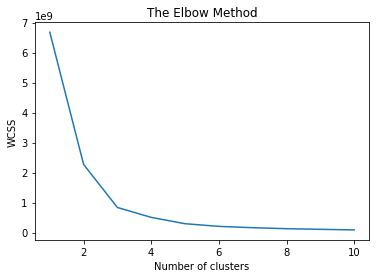

In [97]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Optimal number of clusters is 3 as denoted by the above diagram, corresponding to the elbow in the line graph above

## Using Kmodes to create clusters

In [98]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9836, cost: 131363.0
Run 1, iteration: 2/100, moves: 40, cost: 131363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1123, cost: 126026.0
Run 2, iteration: 2/100, moves: 0, cost: 126026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 145, cost: 126323.0
Run 3, iteration: 2/100, moves: 0, cost: 126323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 677, cost: 136784.0
Run 4, iteration: 2/100, moves: 0, cost: 136784.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 926, cost: 128399.0
Run 5, iteration: 2/100, moves: 0, cost: 128399.0
Best run was number 2
[[864   1  17]
 [138   3   6]
 [661   8  40]]


## Lets take a look at the final dataset with the labels assigned to every row of X

In [99]:
df=pd.DataFrame(X)

In [100]:
df['Cluster']=km.labels_

## Final dataset with cluster labels for every row.

In [101]:
df

,0,1,2,Cluster
0,1188,7,26,0
1,1188,7,28,0
2,1188,7,32,0
3,1188,7,38,0
4,1188,7,52,0
5,1188,7,39,0
6,1188,7,41,0
7,1188,9,41,0
8,1188,7,53,0
9,1188,7,67,0
